In [2]:
import pandas as pd # import Pandas library (and defining shorthand "pd") for reading and manipulating the data files
from matplotlib import pyplot as plt # import and define shorthand "plt" for library "pyplot" providing plotting functions
from IPython.display import display, HTML
import numpy as np   # import and define shorthand "np" for library "numpy" for advanced mathematical operations in python

#read in data from csv files 
#parse_dates function is used on Date-column to change them from string to date-object

x_train = pd.read_csv("train_data.csv", header= None) 
x_test= pd.read_csv("test_data.csv", header= None)
y_train = pd.read_csv("train_labels.csv", header= None) 

In [3]:
display(HTML(x_train.head(5).to_html(max_rows=5)))
display(HTML(y_train.head(5).to_html(max_rows=5)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263
0,1040.7,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.7,1953.4,1513.5,1882.6,1802.7,2050.5,1891.1,1614.4,950.52,787.93,697.59,477.02,301.42,122.39,1.499,580.90,2149.8,1543.60,1046.4,1588.90,1388.5,1527.40,1135.00,1244.20,1088.60,1636.40,1044.80,1763.0,1476.80,1979.7,1503.2,1168.3,286.36,203.43,192.00,106.19,76.905,26.470,0.016,989.470,1484.400,744.62,367.04,961.96,1378.60,963.90,1206.20,926.070,1363.70,1262.30,1185.70,1566.60,1073.40,1383.60,1270.50,1197.40,857.27,1121.20,1373.70,1359.90,2052.60,2598.00,11504.0,3987.6,5632.8,3509.8,2556.8,4313.3,5500.1,3890.4,5192.5,3813.0,5921.8,4324.7,4601.6,7033.8,3856.0,5336.3,4940.8,4560.1,4190.1,5504.3,6080.7,5272.6,9246.9,12185.0,150390.0,831.58,1914.5,2639.0,2439.4,2064.3,1673.4,1931.5,1748.0,1846.5,1492.1,1566.5,1291.5,1552.6,1464.3,1697.6,1575.8,1344.2,863.88,726.28,590.76,393.19,217.53,66.000,1.066,6.04,203.38,430.02,500.56,217.93,303.61,209.62,214.75,291.37,198.77,202.13,169.68,210.85,165.78,231.08,258.48,176.54,21.119,73.797,80.082,37.997,24.555,1.593,1.066,4097.7,8669.9,7205.8,5314.4,7448.6,6748.8,6298.5,6559.9,6393.4,6705.8,6701.1,5542.9,8142.4,6256.2,7571.7,6894.4,5794.4,3102.8,2811.0,2781.5,1743.1,1705.5,1037.8,49.366,0.53113,0.27914,0.29100,0.18867,0.27142,0.43106,0.23045,0.30437,0.19682,0.36930,0.35071,0.22654,0.131870,0.054957,0.084974,0.037669,0.066023,0.125500,0.047220,0.094917,0.040921,0.110060,0.099065,0.045715,0.010,0.009,0.007,0.003,0.002,0.007,0.006,0.006,0.003,0.004,0.003,0.003,1.0,1.0,1.000,1.0,1.0,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1000000.0,1000000.0,1000000.0,1000000.0,0.001894,-0.002000,0.001301,0.001159,-0.006528,-0.001903,0.001681,0.009920,0.036214,2.87780,2.20800,1.68550,0.83286,0.96904,0.63841,0.59397,0.51937,0.33370,0.29621,0.31271,0.014843,-0.166450,-0.110340,-0.175070,-0.117720,-0.192290,-0.082080,-0.085425,-0.085254,-0.067060,-0.055849,-0.052800,0.048145,0.17118,0.216490,0.36548,0.093584,0.166870,0.083426,0.118090,0.089792,0.074371,0.073162,0.059463
1,2309.4,4780.4,4055.7,3120.5,1979.9,2343.6,2634.2,3208.5,3078.0,3374.7,2618.4,2203.2,2917.9,2392.5,3412.5,3336.8,3195.5,3294.10,2555.60,2001.80,1508.30,1168.60,402.94,1.066,2038.80,2753.7,3077.10,1737.4,1074.10,1132.7,1457.20,2895.60,1763.70,3127.60,1480.60,1178.60,1790.6,1588.10,3341.0,3066.2,3481.4,3880.20,2245.00,1215.80,778.90,475.890,74.580,0.000,1169.700,344.560,417.17,472.37,1455.70,1366.80,421.84,428.64,86.718,296.70,480.75,638.11,321.61,681.03,640.37,548.78,816.21,643.31,459.62,522.25,540.80,601.90,848.17,1000.0,5639.6,3393.3,2759.4,3136.1,6513.9,8155.8,3109.7,2628.8,2481.3,2344.0,3278.5,4324.5,3119.0,3911.4,3685.8,3645.5,4673.5,3729.8,3175.7,3737.4,3651.3,3959.7,4198.4,1000.0,2048.90,4685.9,3753.2,2931.3,1821.0,2263.1,2535.8,3027.7,3073.4,2997.8,2537.3,2097.0,2792.3,2224.7,3189.0,3028.7,2766.7,2901.50,2180.20,1816.40,1341.20,1047.70,321.610,1.066,423.67,1052.90,829.21,619.61,315.85,522.90,490.80,525.86,521.01,537.73,453.12,373.04,582.47,271.38,549.15,629.27,612.76,697.750,580.240,442.140,278.230,220.440,41.559,1.066,7691.3,10338.0,9394.9,8255.0,7119.4,8600

,0
0,1
1,1
2,1
3,1
4,1


In [4]:
header= pd.read_csv("x_Header.csv")
x_header= pd.DataFrame(data= header)
x_train.columns= x_header.ID
print(x_train)
y_train.columns = ['Genre']
x_train.info

from sklearn.decomposition import PCA


ID    Rhythm_Mean_1  Rhythm_Median_1  Rhythm_Var_1  Rhythm_Kurtosis_1  \
0           1040.70          2315.60        2839.1             2552.2   
1           2309.40          4780.40        4055.7             3120.5   
2           2331.90          4607.00        4732.3             5007.0   
3           3350.90          6274.40        5037.0             4609.7   
4           2017.60          3351.80        2924.9             2726.3   
5           1229.80          3005.80        2818.4             2640.1   
6           3936.10          6276.30        4768.8             4157.2   
7            556.39          1739.00        2072.0             2713.0   
8           2764.70          4442.60        3930.6             3504.1   
9           3084.70          5645.90        5000.2             4001.9   
10          5951.20          7580.20        5754.6             5564.9   
11          4213.80          4643.20        3625.5             3484.1   
12          2433.90          5086.50        4332.2 

In [24]:
#PCA for all features
# normalize data
from sklearn import preprocessing
x_train_scaled = pd.DataFrame(preprocessing.scale(x_train),columns = x_train.columns) 

# PCA
pca = PCA()
pca.fit_transform(x_train_scaled)
#explained_variance = pca.explained_variance_ratio_ 
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# Dump components relations with features:


array([ 26.72,  36.92,  42.33,  46.06,  48.72,  51.14,  53.32,  55.22,
        56.8 ,  58.25,  59.66,  60.96,  62.19,  63.36,  64.5 ,  65.58,
        66.54,  67.46,  68.28,  69.08,  69.86,  70.62,  71.34,  72.04,
        72.72,  73.37,  74.  ,  74.6 ,  75.17,  75.71,  76.24,  76.75,
        77.25,  77.73,  78.19,  78.64,  79.08,  79.5 ,  79.91,  80.31,
        80.71,  81.1 ,  81.48,  81.84,  82.19,  82.54,  82.88,  83.22,
        83.54,  83.86,  84.17,  84.48,  84.78,  85.08,  85.37,  85.66,
        85.94,  86.21,  86.48,  86.75,  87.01,  87.27,  87.52,  87.77,
        88.01,  88.25,  88.48,  88.71,  88.94,  89.16,  89.38,  89.6 ,
        89.82,  90.03,  90.24,  90.44,  90.64,  90.84,  91.04,  91.23,
        91.42,  91.61,  91.79,  91.97,  92.15,  92.32,  92.49,  92.66,
        92.82,  92.98,  93.14,  93.3 ,  93.45,  93.6 ,  93.75,  93.9 ,
        94.04,  94.18,  94.32,  94.45,  94.58,  94.71,  94.84,  94.96,
        95.08,  95.2 ,  95.32,  95.44,  95.55,  95.66,  95.77,  95.88,
      

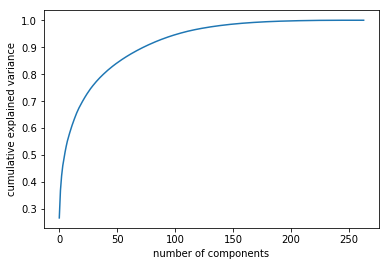

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

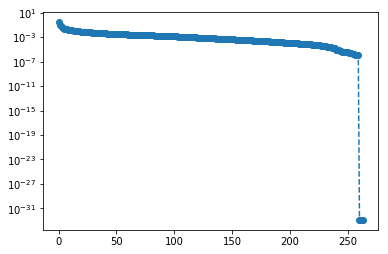

In [32]:
plt.semilogy(pca.explained_variance_ratio_, '--o')

In [23]:

columns = ['pca_%i' % i for i in range(264)]
df_pca = pd.DataFrame(pca.fit_transform(x_train_scaled), columns=columns, index=x_train_scaled.index)
print(df_pca.head())
print(df_pca.shape)

       pca_0      pca_1     pca_2     pca_3     pca_4     pca_5     pca_6  \
0  10.172260   1.694667 -0.908099 -2.644652  2.425741 -1.626391  0.456686   
1  -0.418380   3.199015  1.744679 -3.629045 -0.229053  1.238750 -1.046215   
2   5.912578  -3.099859 -4.522220  0.730105  1.177409 -2.083912  0.141554   
3  -9.366403   4.044805  1.209718  2.280016 -2.095876 -0.703341 -0.050487   
4  -0.996625  11.114370  7.371553  2.692967  2.143128  3.135297 -1.539784   

      pca_7     pca_8     pca_9      ...        pca_254   pca_255   pca_256  \
0  1.528648 -0.662705 -0.640327      ...      -0.002526 -0.004275  0.004402   
1  0.698774  0.293462  2.364849      ...      -0.018821  0.020360  0.011827   
2 -2.158810  1.611637 -1.324483      ...       0.039636  0.005827  0.004846   
3 -0.413534  0.975115  1.441507      ...      -0.036677  0.017936  0.014461   
4 -1.115004 -1.363755 -2.491634      ...       0.031057  0.004529  0.018219   

    pca_257   pca_258   pca_259       pca_260       pca_261   

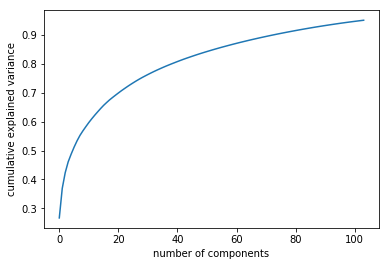

In [26]:
#Choosing principal components for 95% variance retention (Feature selection)
# PCA for 95%
pca_95 = PCA(.95)
pca_95.fit_transform(x_train_scaled)
plt.plot(np.cumsum(pca_95.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [33]:
print(pca_95.n_components_)
print(pca_95.components_)

104
[[-0.06803761 -0.08647819 -0.07699863 ...,  0.00864374 -0.00249209
   0.04088549]
 [-0.05539218 -0.00681261 -0.02140424 ..., -0.06815636 -0.06025744
  -0.05648019]
 [ 0.02138843 -0.04975445 -0.12649925 ...,  0.0421868   0.07092591
  -0.0209419 ]
 ..., 
 [ 0.01359748  0.04072742 -0.04508183 ...,  0.00484714 -0.0501161
   0.16088652]
 [-0.07440016  0.02661444 -0.07408709 ...,  0.02344443  0.01668334
   0.03369017]
 [-0.01838088  0.03111759 -0.0291146  ..., -0.01970547 -0.0008784
   0.00596409]]
